# Decision tree regressor 
This code performing decision tree regression on a dataset using scikit-learn library. 
The dataset is read from a CSV file named 'cwurData.csv' using pandas library. 

In [ ]:
#Import necessary libraries
import pandas as pd
df=pd.read_csv('cwurData.csv')
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


#Data Cleaning
drops certain columns to make data useful to perform classification

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [ ]:
df= df.drop(['institution', 'country','national_rank','year', 'score'], axis=1)
df.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents
0,1,7,9,1,1,1,1,NaN,5
1,2,9,17,3,12,4,4,NaN,1
2,3,17,11,5,4,2,2,NaN,15
3,4,10,24,4,16,16,11,NaN,50
4,5,2,29,7,37,22,22,NaN,18


In [ ]:
df.drop('broad_impact', axis=1, inplace=True)
df.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,1,7,9,1,1,1,1,5
1,2,9,17,3,12,4,4,1
2,3,17,11,5,4,2,2,15
3,4,10,24,4,16,16,11,50
4,5,2,29,7,37,22,22,18


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Define the target and feature variable

In [ ]:
X = df.iloc[:, 1:8].values
y = df.iloc[:, 0].values

In [ ]:
print(X)

[[  7   9   1 ...   1   1   5]
 [  9  17   3 ...   4   4   1]
 [ 17  11   5 ...   2   2  15]
 ...
 [367 549 218 ... 823 812 824]
 [367 567 218 ... 974 812 651]
 [367 567 218 ... 991 812 547]]


Perform Decision tree regresser

Root mean squared error: 0.30
R-squared score: 0.91


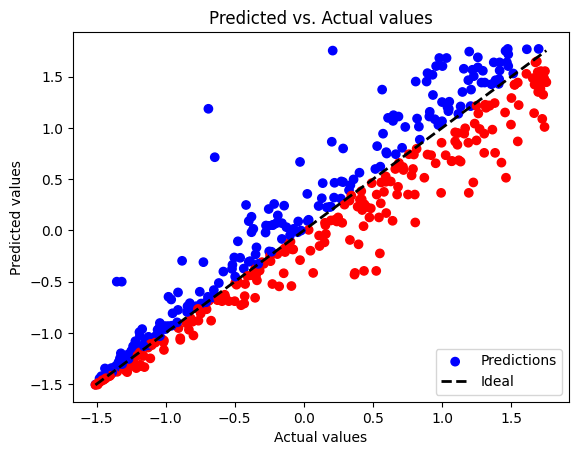

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# scale input and output data using StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# create and fit the decision tree regressor model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# make predictions on the test set
y_pred = dt_reg.predict(X_test)

# calculate and print the root mean squared error and R-squared score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root mean squared error: {rmse:.2f}")
print(f"R-squared score: {r2:.2f}")

# plot predicted vs. actual values with different colors and a legend
plt.scatter(y_test, y_pred, c=['b' if x < y else 'r' for x, y in zip(y_test, y_pred)], label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. Actual values")
plt.legend(loc='lower right')
plt.show()

In conclusion, the model's performance was evaluated using two metrics: root mean squared error (RMSE) and R-squared score. The RMSE value of 0.30 indicates that the model's predictions were, on average, 0.30 units away from the actual values. Additionally, the R-squared score of 0.91 indicates that the model was able to explain 91% of the variance in the data. These results suggest that the model is a good fit for the data and can be used to make accurate predictions.

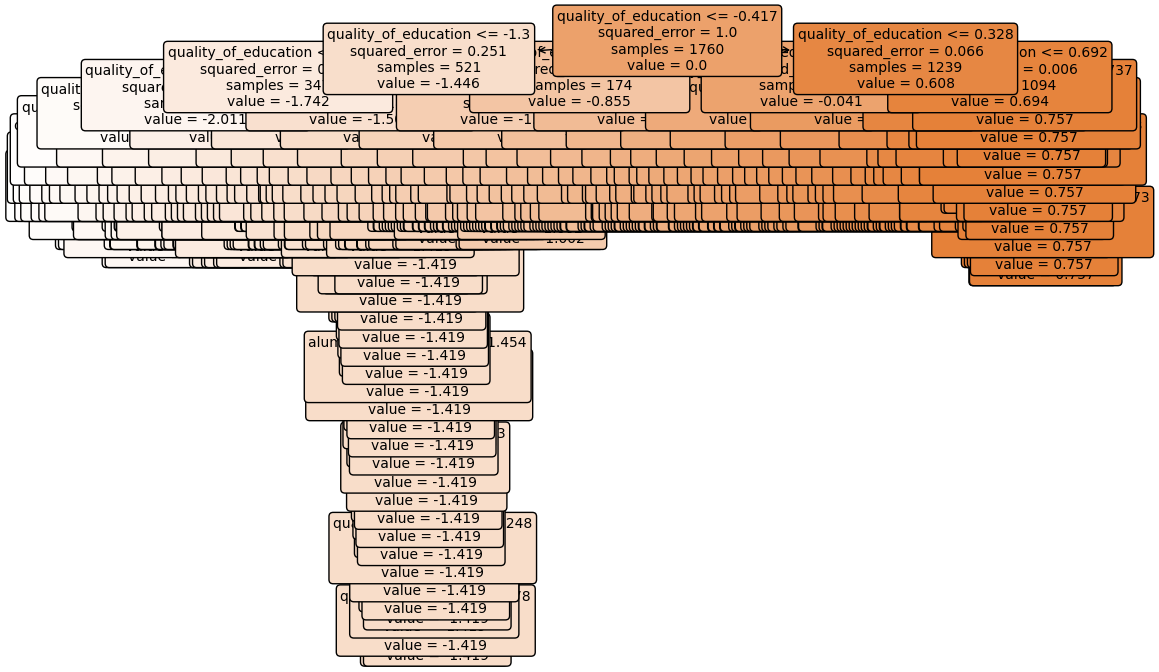

In [ ]:
# plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()


The data has 2000 columns that is why the decision tree is too complex and not able to interpret properly 
Hence in the below code, defining depth and minimum sanples to showcase some part of decision tree

Root mean squared error: 89.73
R-squared score: 0.91


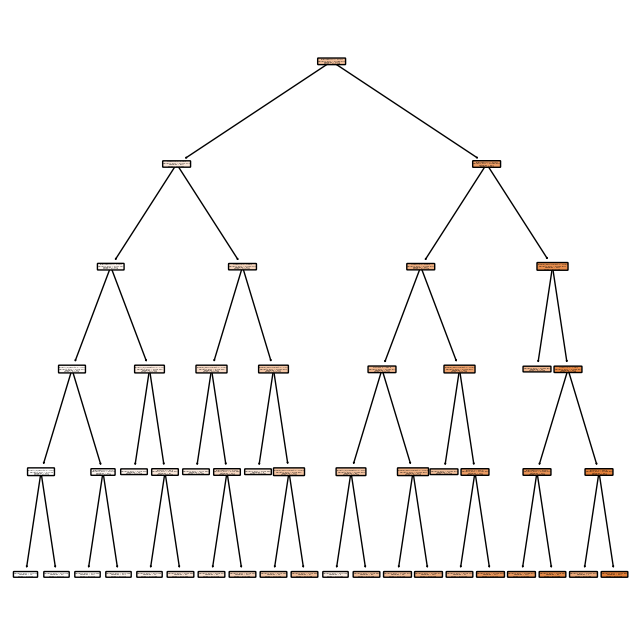

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# separate the features and target variables
X = df.drop('world_rank', axis=1)
y = df['world_rank']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the decision tree regressor model
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=50, random_state=42)
dt_reg.fit(X_train, y_train)

# make predictions on the test set
y_pred = dt_reg.predict(X_test)

# calculate and print the root mean squared error and R-squared score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Root mean squared error: {rmse:.2f}")
print(f"R-squared score: {r2:.2f}")

# plot the decision tree
plt.figure(figsize=(8, 8))
plot_tree(dt_reg, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()


# Conclusion 
Based on the results obtained from the decision tree model, the root mean squared error is 89.73, indicating that the average difference between predicted and actual values is 89.73. The R-squared score is 0.91, which means that the model explains 91% of the variance in the target variable. This suggests that the decision tree model is a good fit for the data. The small part of decision tree itself can be examined to gain insights into the relationships between the features and the target variable.